In [1]:

import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sns



# Analysis of the output in result folder

In [2]:
result_dir = os.path.join(os.path.abspath("../results"))
stats_and_vis_dir = os.path.join(os.path.abspath("../stats_and_vis"))
data_dir = "../data"


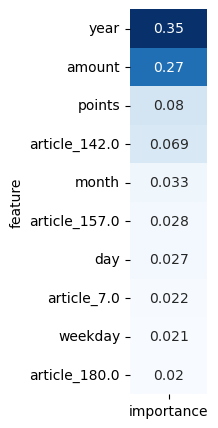

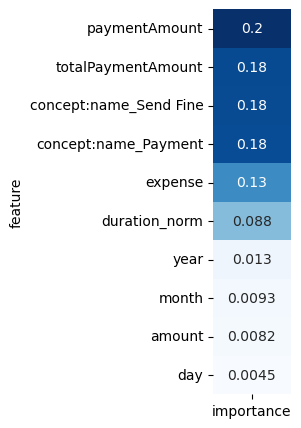

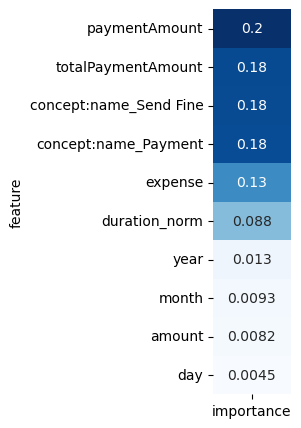

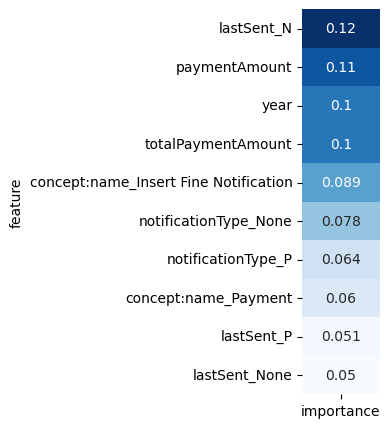

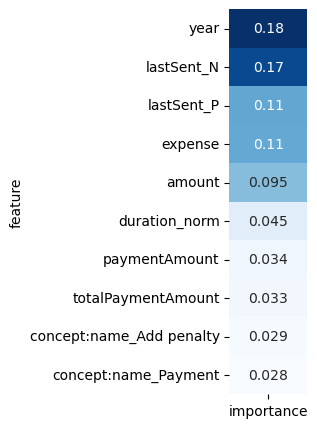

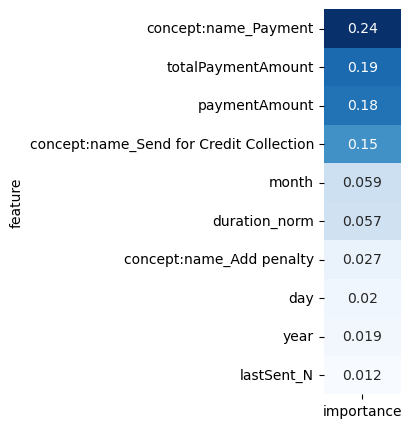

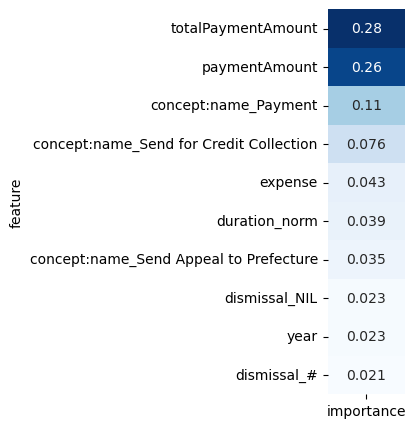

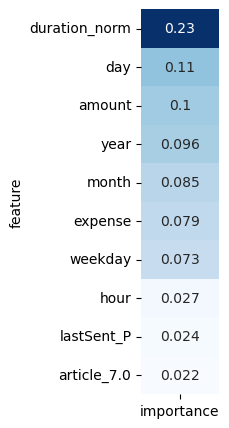

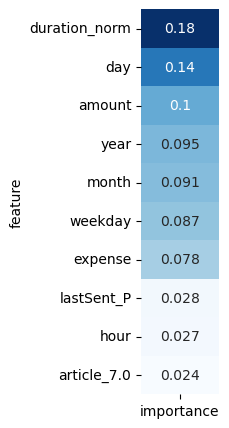

In [3]:
#plot feature importance
for file in os.listdir(os.path.join(result_dir, "feature_importance")):
    if file.endswith(".csv"):
        feature_importance = pd.read_csv(os.path.join(result_dir, "feature_importance", file))
        feature_importance = feature_importance.rename(columns={"Unnamed: 0": "feature"})
        feature_importance = feature_importance.set_index("feature")
        #take only the top 10 features
        feature_importance = feature_importance.sort_values(by="importance", ascending=False).head(10)
        #make heatmap of feature importance
        fig, ax = plt.subplots(figsize=(1,5))
        sns.heatmap(feature_importance, annot=True, ax=ax, cmap="Blues", cbar=False)

        ax.tick_params(axis='y', rotation=0)
        #dont show
        
        plt.savefig(os.path.join(stats_and_vis_dir, "feature_importance", file[:-4] + ".png"), dpi=600,bbox_inches='tight')

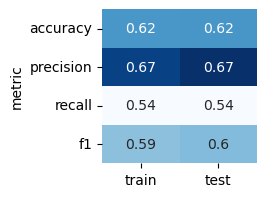

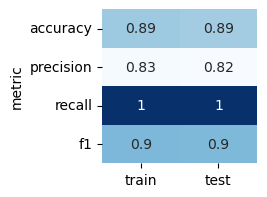

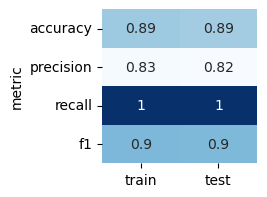

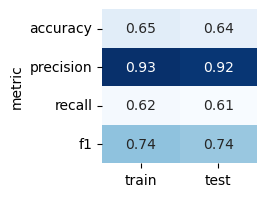

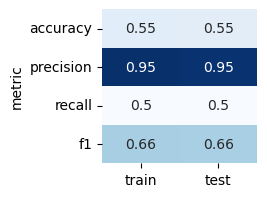

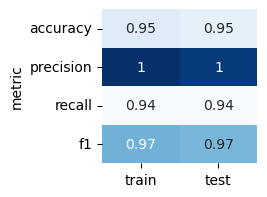

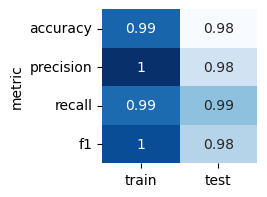

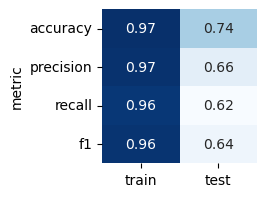

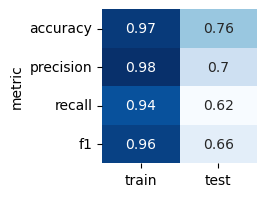

In [4]:
#model_metrics
f1_scores_test = []
f1_scores_train = []
for file in os.listdir(os.path.join(result_dir, "model_metrics")):
    if file.endswith(".csv"):
        model_metrics = pd.read_csv(os.path.join(result_dir, "model_metrics", file))
        model_metrics = model_metrics.rename(columns={"Unnamed: 0": "metric"})
        model_metrics = model_metrics.set_index("metric")
        f1_scores_test.append(model_metrics.loc["f1", "test"])
        f1_scores_train.append(model_metrics.loc["f1", "train"])
        fig, ax = plt.subplots(figsize=(2,2))
        sns.heatmap(model_metrics, annot=True, ax=ax, cmap="Blues", cbar=False)
        ax.tick_params(axis='y', rotation=0)
        plt.savefig(os.path.join(stats_and_vis_dir, "model_metrics", file[:-4] + ".png"), dpi=600,bbox_inches='tight')

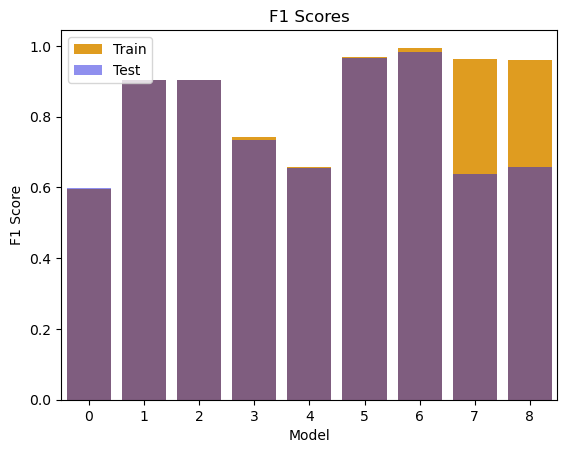

In [19]:

f1_scores = pd.DataFrame({"f1_scores_test": f1_scores_test, "f1_scores_train": f1_scores_train})

# Plot f1 scores
sns.barplot(x=f1_scores.index, y="f1_scores_train", color = "orange", data=f1_scores, label = "Train")
sns.barplot(x=f1_scores.index, y="f1_scores_test", color="blue", data=f1_scores, alpha = 0.5, label="Test")


# Set title and axis labels
plt.title("F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
#legend upper left
plt.legend(loc=2)
plt.savefig(os.path.join(stats_and_vis_dir, "model_metrics", "f1_scores" + ".png"), dpi=600)
plt.show()